In [1]:
import numpy as np
import time
import generalized_genSim_shorten_time_HMM as ggsdHMM
import eval_helper as eh
import matplotlib.pyplot as plt

Reached import hoc
Reached import neuron.hoc


In [2]:
# Finds the average square difference between two corresponding lists
# This function will likely be used to find the average error 
# L1 the first list
# L2 the second list
def avg_square_error(l1, l2):
    l1_len = len(l1)
    assert l1_len == len(l2), 'list lengths must be the same'
    sum = 0
    for i in range(l1_len):
        sum += (l1[i] - l2[i])**2
    return sum/l1_len

# Finds the average square error between a scaling and the wild type. 
# Does this for a number of scale factors between 0 and 1, the number
# depending on how long the function is run.
def error_finding_func(param_list, param_inds, param_name, time_run, limit):

    init_val = param_list[param_inds[param_name]]
    eh.change_params(param_list, scaled=False, is_HMM=True)
    rec_inact_tau, recov, times = ggsdHMM.RFI(channel_name='na12mut8st').genRecInactTau()
    benchmark_act, v_vec, all_is_act = ggsdHMM.Activation(channel_name='na12mut8st').genActivation()
    benchmark_inact, v_vec, all_is_inact = ggsdHMM.Inactivation(channel_name='na12mut8st').genInactivation()
    benchmark_rec = recov[0]
    
    
    fringe = [init_val - limit, init_val + limit]
    results_recov = []
    results_act = []
    results_inact = []
    start_time = time.time()
    end_time = start_time + time_run
    while time.time() < end_time:
        i = 0
        while True:
            val_2 = fringe[i + 1]
            val_1 = fringe[i]
            between_val = val_1 + (val_2 - val_1) / 2
            fringe.insert(i + 1, between_val)
            results_recov.append((between_val, scaling_error_recov(param_list, param_inds, param_name, between_val, benchmark_rec)))
            results_act.append((between_val, scaling_error_act(param_list, param_inds, param_name, between_val, benchmark_act)))
            results_inact.append((between_val, scaling_error_inact(param_list, param_inds, param_name, between_val, benchmark_inact)))
            if (val_2 == init_val + limit):
                break
            else: 
                i += 2
    results_recov.sort(key = lambda x: x[0])
    results_act.sort(key = lambda x: x[0])
    results_inact.sort(key = lambda x: x[0])
    param_list[param_inds[param_name]] = init_val
    return results_recov, results_act, results_inact

def scaling_error_recov(param_list, param_inds, param_name, scaling_factor, benchmark):
        param_list[param_inds[param_name]] = scaling_factor
        eh.change_params(param_list, scaled=False, is_HMM = True)
        rec_inact_tau, recov, times = ggsdHMM.RFI(channel_name='na12mut8st').genRecInactTau()
        return avg_square_error(recov[0], benchmark)

def scaling_error_act(param_list, param_inds, param_name, scaling_factor, benchmark):
        param_list[param_inds[param_name]] = scaling_factor
        eh.change_params(param_list, scaled=False, is_HMM = True)
        gnorm_vec, v_vec, all_is = ggsdHMM.Activation(channel_name='na12mut8st').genActivation()
        return avg_square_error(gnorm_vec, benchmark)

def scaling_error_inact(param_list, param_inds, param_name, scaling_factor, benchmark):
        param_list[param_inds[param_name]] = scaling_factor
        eh.change_params(param_list, scaled=False, is_HMM = True)
        inorm_vec, v_vec, all_is = ggsdHMM.Inactivation(channel_name='na12mut8st').genInactivation()
        return avg_square_error(inorm_vec, benchmark)

# Unzip a list of tuples into two lists x and y
def unzip(list_of_tuples):
    x = []
    y = []
    for t in list_of_tuples:
        x.append(t[0])
        y.append(t[1])
    return x, y

In [ ]:
initial_params_dict = {
        'a1_0_na12mut8st' : 4.584982656184167e+01,
        'a1_1_na12mut8st' : 2.393541665657613e-02,
        'b1_0_na12mut8st' : 1.440952344322651e-02,
        'b1_1_na12mut8st' : 8.847609128769419e-02,
        'a2_0_na12mut8st' : 1.980838207143563e+01,
        'a2_1_na12mut8st' : 2.217709530008501e-02,
        'b2_0_na12mut8st' : 5.650174488683913e-01,
        'b2_1_na12mut8st' : 6.108403283302217e-02,
        'a3_0_na12mut8st' : 7.181189201089192e+01,
        'a3_1_na12mut8st' : 6.593790601261940e-02,
        'b3_0_na12mut8st' : 7.531178253431512e-01,
        'b3_1_na12mut8st' : 3.647978133116471e-02,
        'bh_0_na12mut8st' : 2.830146966213825e+00,
        'bh_1_na12mut8st' : 2.890045633775495e-01,
        'bh_2_na12mut8st' : 6.960300544163878e-02,
        'ah_0_na12mut8st' : 5.757824421450554e-01,
        'ah_1_na12mut8st' : 1.628407420157048e+02,
        'ah_2_na12mut8st' : 2.680107016756367e-02,
        'vShift_na12mut8st' : 10,
        'vShift_inact_na12mut8st' : 10
}
initial_params_list = [
    4.584982656184167e+01,
    2.393541665657613e-02,
    1.440952344322651e-02,
    8.847609128769419e-02,
    1.980838207143563e+01,
    2.217709530008501e-02,
    5.650174488683913e-01,
    6.108403283302217e-02,
    7.181189201089192e+01,
    6.593790601261940e-02,
    7.531178253431512e-01,
    3.647978133116471e-02,
    2.830146966213825e+00,
    2.890045633775495e-01,
    6.960300544163878e-02,
    5.757824421450554e-01,
    1.628407420157048e+02,
    2.680107016756367e-02,
    10,
    10
]
inds = {
    'a1_0' : 0,
    'a1_1' : 1,
    'b1_0' : 2,
    'b1_1' : 3,
    'a2_0' : 4,
    'a2_1' : 5,
    'b2_0' : 6,
    'b2_1' : 7,
    'a3_0' : 8,
    'a3_1' : 9,
    'b3_0' : 10,
    'b3_1' : 11,
    'bh_0' : 12,
    'bh_1' : 13,
    'bh_2' : 14,
    'ah_0' : 15,
    'ah_1' : 16,
    'ah_2' : 17,
    'vShift' : 18,
    'vShift_inact' : 19
}

In [13]:

errors = error_finding_func(initial_params_list, inds, 'a1_0', 300, 100*initial_params_dict['a1_0_na12mut8st'])


In [14]:
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)


Text(0, 0.5, 'Error')

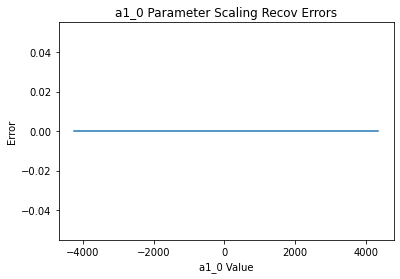

In [15]:
plt.plot(recov_x, recov_y)
plt.title('a1_0 Parameter Scaling Recov Errors')
plt.xlabel('a1_0 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

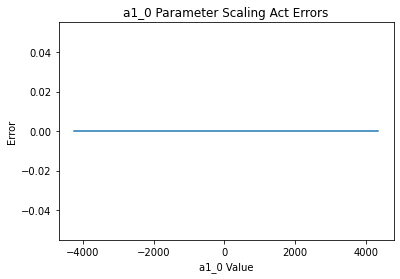

In [16]:
plt.plot(act_x, act_y)
plt.title('a1_0 Parameter Scaling Act Errors')
plt.xlabel('a1_0 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

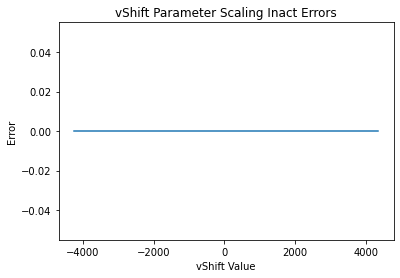

In [17]:
plt.plot(inact_x, inact_y)
plt.title('vShift Parameter Scaling Inact Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

In [9]:
errors = error_finding_func(initial_params_list, inds, 'a1_1', 600, 100*initial_params_dict['a1_1_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)


Text(0, 0.5, 'Error')

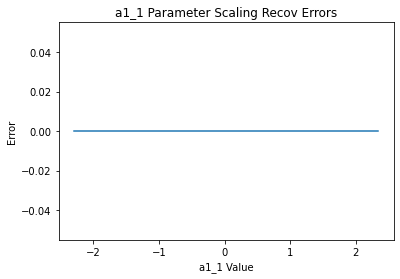

In [10]:
plt.plot(recov_x, recov_y)
plt.title('a1_1 Parameter Scaling Recov Errors')
plt.xlabel('a1_1 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

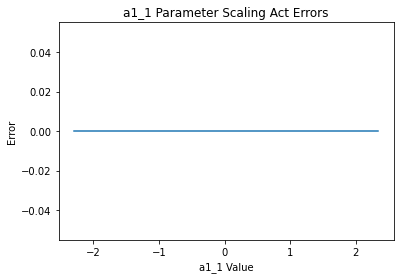

In [11]:
plt.plot(act_x, act_y)
plt.title('a1_1 Parameter Scaling Act Errors')
plt.xlabel('a1_1 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

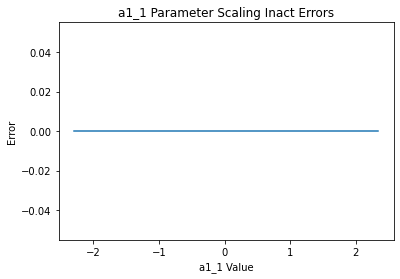

In [12]:
plt.plot(inact_x, inact_y)
plt.title('a1_1 Parameter Scaling Inact Errors')
plt.xlabel('a1_1 Value')
plt.ylabel('Error')

In [136]:
errors = error_finding_func(initial_params_list, inds, 'b1_0', 120, 100*initial_params_dict['b1_0_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

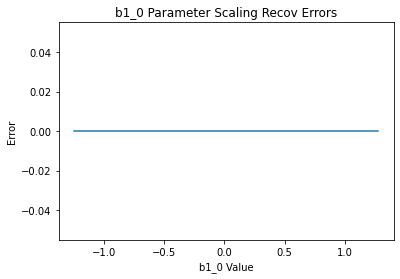

In [137]:
plt.plot(recov_x, recov_y)
plt.title('b1_0 Parameter Scaling Recov Errors')
plt.xlabel('b1_0 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

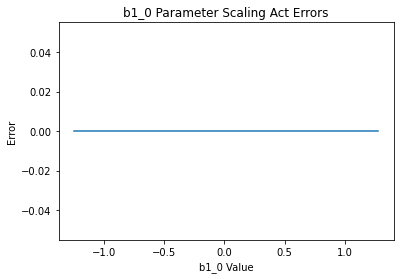

In [138]:
plt.plot(act_x, act_y)
plt.title('b1_0 Parameter Scaling Act Errors')
plt.xlabel('b1_0 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

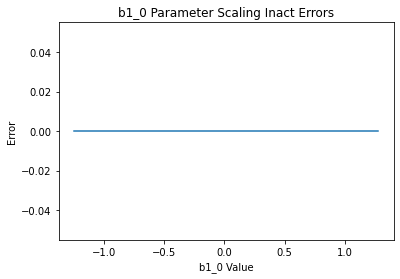

In [139]:
plt.plot(inact_x, inact_y)
plt.title('b1_0 Parameter Scaling Inact Errors')
plt.xlabel('b1_0 Value')
plt.ylabel('Error')

In [140]:
errors = error_finding_func(initial_params_list, inds, 'b1_1', 120, 100*initial_params_dict['b1_1_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

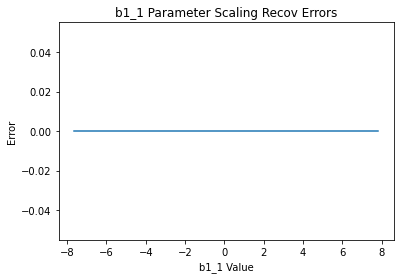

In [141]:
plt.plot(recov_x, recov_y)
plt.title('b1_1 Parameter Scaling Recov Errors')
plt.xlabel('b1_1 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

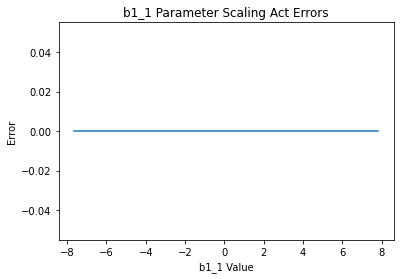

In [142]:
plt.plot(act_x, act_y)
plt.title('b1_1 Parameter Scaling Act Errors')
plt.xlabel('b1_1 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

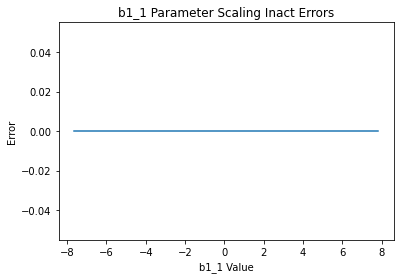

In [143]:
plt.plot(inact_x, inact_y)
plt.title('b1_1 Parameter Scaling Inact Errors')
plt.xlabel('b1_1 Value')
plt.ylabel('Error')

In [144]:
errors = error_finding_func(initial_params_list, inds, 'a2_0', 120, 100*initial_params_dict['a2_0_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

KeyboardInterrupt: 

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('a2_0 Parameter Scaling Recov Errors')
plt.xlabel('a2_0 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('a2_0 Parameter Scaling Act Errors')
plt.xlabel('a2_0 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('a2_0 Parameter Scaling Inact Errors')
plt.xlabel('a2_0 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'a2_1', 120, 5*initial_params_dict['a2_1_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('a2_1 Parameter Scaling Recov Errors')
plt.xlabel('a2_1 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('a2_1 Parameter Scaling Act Errors')
plt.xlabel('a2_1 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('a2_1 Parameter Scaling Inact Errors')
plt.xlabel('a2_1 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'b2_0', 120, 100*initial_params_dict['b2_0_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('b2_0 Parameter Scaling Recov Errors')
plt.xlabel('b2_0 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('b2_0 Parameter Scaling Act Errors')
plt.xlabel('b2_0 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('b2_0 Parameter Scaling Inact Errors')
plt.xlabel('b2_0 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'b2_1', 120, 100*initial_params_dict['b2_1_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('b2_1 Parameter Scaling Recov Errors')
plt.xlabel('b2_1 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('b2_1 Parameter Scaling Act Errors')
plt.xlabel('b2_1 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('b2_1 Parameter Scaling Inact Errors')
plt.xlabel('b2_1 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'a3_0', 120, 100*initial_params_dict['a3_0_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('a3_0 Parameter Scaling Recov Errors')
plt.xlabel('a3_0 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('a3_0 Parameter Scaling Act Errors')
plt.xlabel('a3_0 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('a3_0 Parameter Scaling Inact Errors')
plt.xlabel('a3_0 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'a3_1', 120, 100*initial_params_dict['a3_1_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('a3_1 Parameter Scaling Recov Errors')
plt.xlabel('a3_1 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('a3_1 Parameter Scaling Act Errors')
plt.xlabel('a3_1 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('a3_1 Parameter Scaling Inact Errors')
plt.xlabel('a3_1 Value')
plt.ylabel('Error')

In [111]:
errors = error_finding_func(initial_params_list, inds, 'b3_0', 300, 100*initial_params_dict['b3_0_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

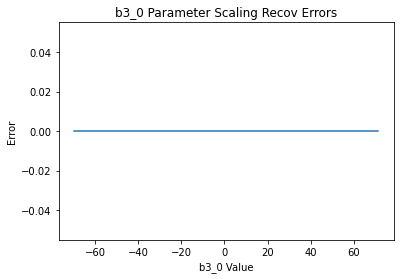

In [112]:
plt.plot(recov_x, recov_y)
plt.title('b3_0 Parameter Scaling Recov Errors')
plt.xlabel('b3_0 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

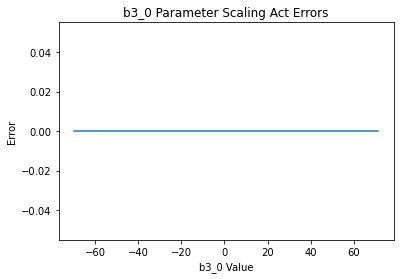

In [113]:
plt.plot(act_x, act_y)
plt.title('b3_0 Parameter Scaling Act Errors')
plt.xlabel('b3_0 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

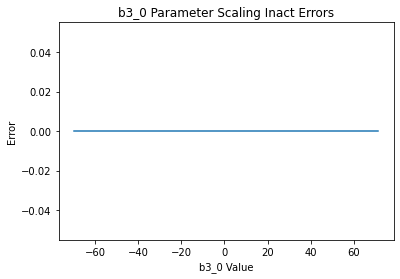

In [114]:
plt.plot(inact_x, inact_y)
plt.title('b3_0 Parameter Scaling Inact Errors')
plt.xlabel('b3_0 Value')
plt.ylabel('Error')

In [115]:
errors = error_finding_func(initial_params_list, inds, 'b3_1', 300, 100*initial_params_dict['b3_1_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

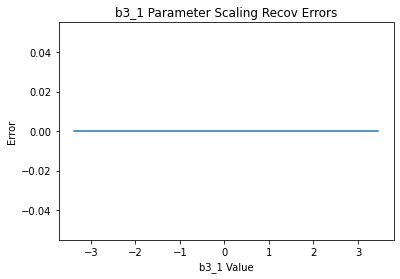

In [116]:
plt.plot(recov_x, recov_y)
plt.title('b3_1 Parameter Scaling Recov Errors')
plt.xlabel('b3_1 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

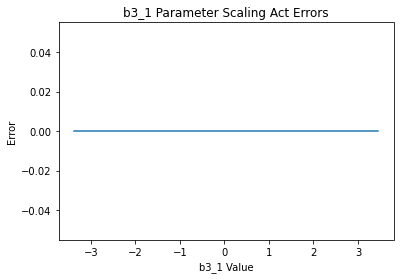

In [117]:
plt.plot(act_x, act_y)
plt.title('b3_1 Parameter Scaling Act Errors')
plt.xlabel('b3_1 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

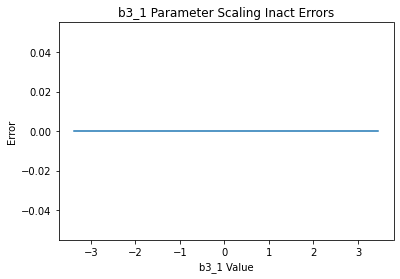

In [118]:
plt.plot(inact_x, inact_y)
plt.title('b3_1 Parameter Scaling Inact Errors')
plt.xlabel('b3_1 Value')
plt.ylabel('Error')

In [119]:
errors = error_finding_func(initial_params_list, inds, 'bh_0', 300, 100*initial_params_dict['bh_0_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

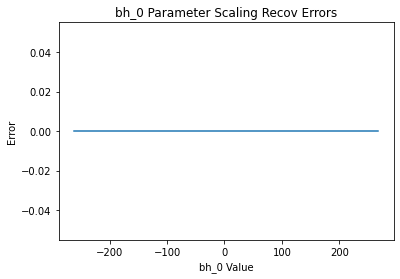

In [120]:
plt.plot(recov_x, recov_y)
plt.title('bh_0 Parameter Scaling Recov Errors')
plt.xlabel('bh_0 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

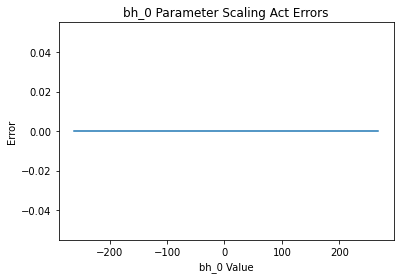

In [121]:
plt.plot(act_x, act_y)
plt.title('bh_0 Parameter Scaling Act Errors')
plt.xlabel('bh_0 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

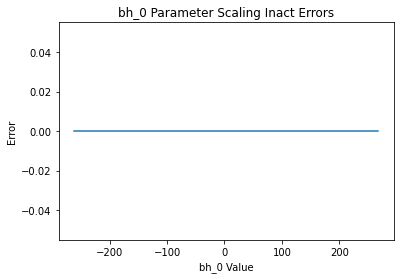

In [122]:
plt.plot(inact_x, inact_y)
plt.title('bh_0 Parameter Scaling Inact Errors')
plt.xlabel('bh_0 Value')
plt.ylabel('Error')

In [123]:
errors = error_finding_func(initial_params_list, inds, 'bh_1', 300, 100*initial_params_dict['bh_1_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

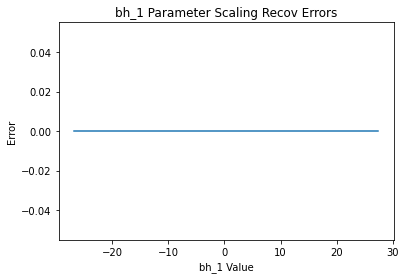

In [124]:
plt.plot(recov_x, recov_y)
plt.title('bh_1 Parameter Scaling Recov Errors')
plt.xlabel('bh_1 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

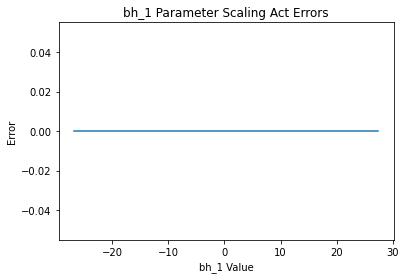

In [125]:
plt.plot(act_x, act_y)
plt.title('bh_1 Parameter Scaling Act Errors')
plt.xlabel('bh_1 Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

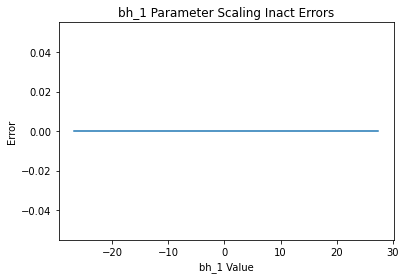

In [126]:
plt.plot(inact_x, inact_y)
plt.title('bh_1 Parameter Scaling Inact Errors')
plt.xlabel('bh_1 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'bh_2', 300, 100*initial_params_dict['bh_2_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('bh_2 Parameter Scaling Recov Errors')
plt.xlabel('bh_2 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('bh_2 Parameter Scaling Act Errors')
plt.xlabel('bh_2 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('bh_2 Parameter Scaling Inact Errors')
plt.xlabel('bh_2 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'ah_0', 300, 100*initial_params_dict['ah_0_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('ah_0 Parameter Scaling Recov Errors')
plt.xlabel('ah_0 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('ah_0 Parameter Scaling Act Errors')
plt.xlabel('ah_0 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('ah_0 Parameter Scaling Inact Errors')
plt.xlabel('ah_0 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'ah_1', 300, 100*initial_params_dict['ah_1_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('ah_1 Parameter Scaling Recov Errors')
plt.xlabel('ah_1 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('ah_1 Parameter Scaling Act Errors')
plt.xlabel('ah_1 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('ah_1 Parameter Scaling Inact Errors')
plt.xlabel('ah_1 Value')
plt.ylabel('Error')

In [ ]:
errors = error_finding_func(initial_params_list, inds, 'ah_2', 300, 100*initial_params_dict['ah_2_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('ah_2 Parameter Scaling Recov Errors')
plt.xlabel('ah_2 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('ah_2 Parameter Scaling Act Errors')
plt.xlabel('ah_2 Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('ah_2 Parameter Scaling Inact Errors')
plt.xlabel('ah_2 Value')
plt.ylabel('Error')

In [153]:
errors = error_finding_func(initial_params_list, inds, 'vShift', 120, 1)
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [ ]:
plt.plot(recov_x, recov_y)
plt.title('vShift Parameter Scaling Recov Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

In [ ]:
plt.plot(act_x, act_y)
plt.title('vShift Parameter Scaling Act Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

In [ ]:
plt.plot(inact_x, inact_y)
plt.title('vShift Parameter Scaling Inact Errors')
plt.xlabel('vShift Value')
plt.ylabel('Error')

In [145]:
errors = error_finding_func(initial_params_list, inds, 'vShift_inact', 300, 100*initial_params_dict['vShift_inact_na12mut8st'])
recov, act, inact = errors
recov_x, recov_y = unzip(recov)
act_x, act_y = unzip(act)
inact_x, inact_y = unzip(inact)

Text(0, 0.5, 'Error')

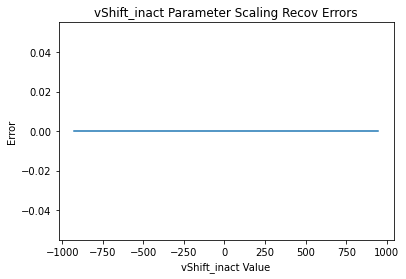

In [146]:
plt.plot(recov_x, recov_y)
plt.title('vShift_inact Parameter Scaling Recov Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

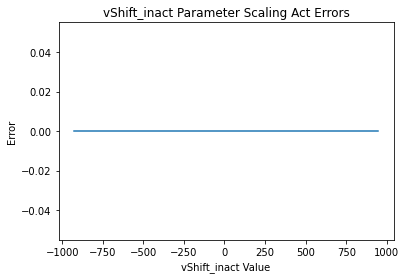

In [147]:
plt.plot(act_x, act_y)
plt.title('vShift_inact Parameter Scaling Act Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')

Text(0, 0.5, 'Error')

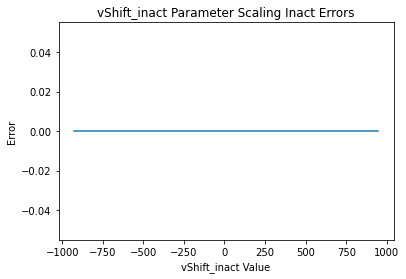

In [148]:
plt.plot(inact_x, inact_y)
plt.title('vShift_inact Parameter Scaling Inact Errors')
plt.xlabel('vShift_inact Value')
plt.ylabel('Error')